In [220]:
from abc import ABCMeta, abstractmethod

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [221]:
G = nx.Graph()

In [329]:
class _Move:
  def __init__(self, move):
    self.move = move

  def __call__(self):
    return self.move

class Move:
  default_move = [0,0]
  def __new__(*args):
    return _Move(args[0].__call__(*args))
    
  def __call__(*args):
    if len(args)==1:
      return args[0].default_move
    elif len(args)==2:
      return args[1]
    elif len(args)==3:
      return [*args[1:]]
    else:
      return None

class Down(Move):
  default_move = [-1,0]

  def __call__(*args):
    if len(args)==1:
      return args[0].default_move
    elif len(args)==2:
      return [-args[1],0]
    else:
      return None

class Up(Move):
  default_move = [1,0]

  def __call__(*args):
    if len(args)==1:
      return args[0].default_move
    elif len(args)==2:
      return [args[1],0]
    else:
      return None
 
class Left(Move):
  default_move = [0,-1]

  def __call__(*args):
    if len(args)==1:
      return args[0].default_move
    elif len(args)==2:
      return [0,-args[1]]
    else:
      return None

class Right(Move):
  default_move = [0,1]

  def __call__(*args):
    if len(args)==1:
      return args[0].default_move
    elif len(args)==2:
      return [0,args[1]]
    else:
      return None
    
print(Move()
print(Move([0,2]))
print(Move(0,2))
print(Down())
print(Down(3))
print(Up())
print(Up(3))
print(Left())
print(Left(3))
print(Right())
print(Right(3))

[1, 3]

In [340]:
class Board:
  
  def __init__(self, width, length, error_code=-1):
    self.pos_type = list
    self.width = width
    self.length = length
    self.board_size = width*length
    self.error_code = error_code

  def row_from_pos_code(self, pos_code):
    return self.validated_row(pos_code/self.width)
  
  def col_from_pos_code(self, pos_code):
    return self.validated_col(pos_code%self.width)
    
  def pos_from_pos_code(self, pos_code):
    return [self.row_from_pos_code(pos_code),
            self.col_from_pos_code(pos_code)]
    
  def pos(self, pos_either):
    return pos_either if pos_either.__class__==self.pos_type else self.pos_from_pos_code(pos_either) 
    
  def row(self, pos):
    pos = self.pos(pos)
    return self.validated_row(pos[0])
  
  def col(self, pos):
    pos = self.pos(pos)
    return self.validated_col(pos[1])

  def is_in_range(self, pos_code, min, max, left_inclusive=True, right_inclusive=False):
    if left_inclusive:
      min -= 1
    if right_inclusive:
      max += 1
    return True if pos_code>min and pos_code<max else False
    
  def is_valid_pos_code(self, pos):
    return self.is_in_range(pos, 0, self.board_size)
  
  def is_valid_row(self, row):
    return self.is_in_range(row, 0, self.length)
  
  def is_valid_col(self, col):
    return self.is_in_range(col, 0, self.width)

  def is_valid_pos(self, pos):
    return self.is_valid_row(self.row(pos)) and self.is_valid_col(self.col(pos))

  def validated_pos(self, pos):
    return pos if self.is_valid_pos(pos) else self.error_code

  def validated_row(self, row):
    return row if self.is_valid_row(row) else self.error_code

  def validated_col(self, col):
    return col if self.is_valid_col(col) else self.error_code
  
  def is_same_row(self, pos1, pos2):
    return self.row(pos1)==self.row(pos2)
  
  def is_same_col(self, pos1, pos2):
    return self.col(pos1)==self.col(pos2)
   
  def move(self, init_pos, move):
    if not isinstance(move,_Move):
      raise "move must be a Move"
    init_pos = self.pos(init_pos)
    return self.validated_pos(list(map(sum,zip(init_pos,move()))))
    

In [341]:
board = Board(8,8)

In [342]:
board.move([0,0],Up(5))

[5, 0]

In [59]:
board_width = 8
board_length = 8
board_size = board_width*board_length
labels = range(0,board_size)
G.add_nodes_from(labels)
pos = {i:(i%8,int(i/8)) for i in labels}

In [71]:
pawn_graph = G.copy()
for i in range(0,board_size-board_width):
  pawn_graph.add_edge(i,i+8)

bishop_graph = G.copy()
for i in range(0,board_size):
  
  pawn_graph.add_edge(i,)

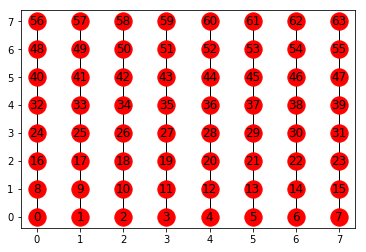

In [69]:
nx.draw_networkx(G,pos)